In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
User_offer_completion_data=pd.read_csv("/content/Q2_User offer completion data (1).csv",index_col=0)
# User_offer_completion_data

In [ ]:
User_offer_data=pd.read_csv("/content/Q2_User offer data.csv",index_col=0)
# User_offer_data

In [ ]:
rewards_details=pd.read_csv("/content/Q2_rewards details.csv",index_col=0)
# rewards_details

In [ ]:
users_signup=pd.read_csv("/content/Q2_users signup.csv",index_col=0)
users_signup

,app_id,signed_up_on,last_login_date
user_id,,,
c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26
7cdb9d2c-9644-42d0-8d44-50fa57747523,sikka,2022-11-26,2022-11-26
e2dfd115-a8b0-4e3e-96e5-9b11e5f316f1,sikka,2022-11-26,2022-11-28
f55000a3-dd68-44d8-b461-41c85d963ce2,sikka,2022-11-26,2022-11-27
a6d5ed73-5c1c-4666-a592-f93ab4489cf5,sikka,2022-11-26,2022-11-26
...,...,...,...
fe1a886f-08c0-4cd2-9e0b-27494ee4fef5,sikka_pro,2022-11-26,2022-11-26
0e205d6d-d50b-4dba-a0cd-0355b4f2cc49,sikka_pro,2022-11-26,2022-11-29
bba5bdf4-9728-42c3-8897-a7dc73ec3594,sikka_pro,2022-11-26,2022-11-26


In [ ]:
merged_data = pd.merge(User_offer_completion_data, User_offer_data, on="user_id", how="inner")

# Merge with rewards_details
merged_data = pd.merge(merged_data, rewards_details, on="offer_id", how="inner")

# Merge with users_signup
merged_data = pd.merge(merged_data, users_signup, on="app_id", how="inner")

# Filter data for 'Sikka' and 'Sikka Pro' apps
sikka_data = merged_data[merged_data['app_id'].isin(['sikka', 'sikka_pro'])]

# Print the merged data
sikka_data.head()

,reward_id_x,user_id,date,app_id,offer_id,status,started_at,completed_at,expires_at,reward_id_y,label_in_english,total_payout_in_paise,total_revenue_in_paise,signed_up_on,last_login_date
0,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka,3340,ONGOING,2022-11-26 00:13:53.620425+00:00,NaN,2022-11-28 00:13:53.625780+00:00,3530,Open Account,7000,22000,2022-11-26,2022-11-26
1,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka,3340,ONGOING,2022-11-26 00:13:53.620425+00:00,NaN,2022-11-28 00:13:53.625780+00:00,3530,Open Account,7000,22000,2022-11-26,2022-11-26
2,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka,3340,ONGOING,2022-11-26 00:13:53.620425+00:00,NaN,2022-11-28 00:13:53.625780+00:00,3530,Open Account,7000,22000,2022-11-26,2022-11-28
3,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka,3340,ONGOING,2022-11-26 00:13:53.620425+00:00,NaN,2022-11-28 00:13:53.625780+00:00,3530,Open Account,7000,22000,2022-11-26,2022-11-27
4,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka,3340,ONGOING,2022-11-26 00:13:53.620425+00:00,NaN,2022-11-28 00:13:53.625780+00:00,3530,Open Account,7000,22000,2022-11-26,2022-11-26


In [ ]:
sikka_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61704 entries, 0 to 61703
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   reward_id_x             61704 non-null  int64 
 1   user_id                 61704 non-null  object
 2   date                    61704 non-null  object
 3   app_id                  61704 non-null  object
 4   offer_id                61704 non-null  int64 
 5   status                  61704 non-null  object
 6   started_at              61704 non-null  object
 7   completed_at            11452 non-null  object
 8   expires_at              50252 non-null  object
 9   reward_id_y             61704 non-null  int64 
 10  label_in_english        61704 non-null  object
 11  total_payout_in_paise   61704 non-null  int64 
 12  total_revenue_in_paise  61704 non-null  int64 
 13  signed_up_on            61704 non-null  object
 14  last_login_date         61704 non-null  object
dtypes:

In [ ]:
#unique users for the given data
sikka_data["user_id"].nunique()

28

App_users Counts:
app_id
sikka        64
sikka_pro    36
Name: app_id, dtype: int64


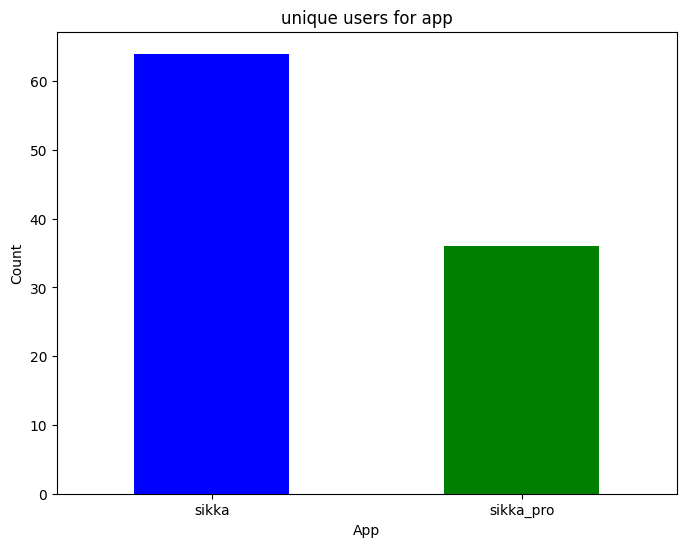

In [ ]:
App_users_counts = users_signup.groupby('app_id')['app_id'].count()

# Print the results
print("App_users Counts:")
print(App_users_counts)

# Visualize Offer Initiation
plt.figure(figsize=(8, 6))
App_users_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('unique users for app')
plt.xlabel('App')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



Offer Initiation Counts:
app_id
sikka        29952
sikka_pro    31752
Name: reward_id_x, dtype: int64


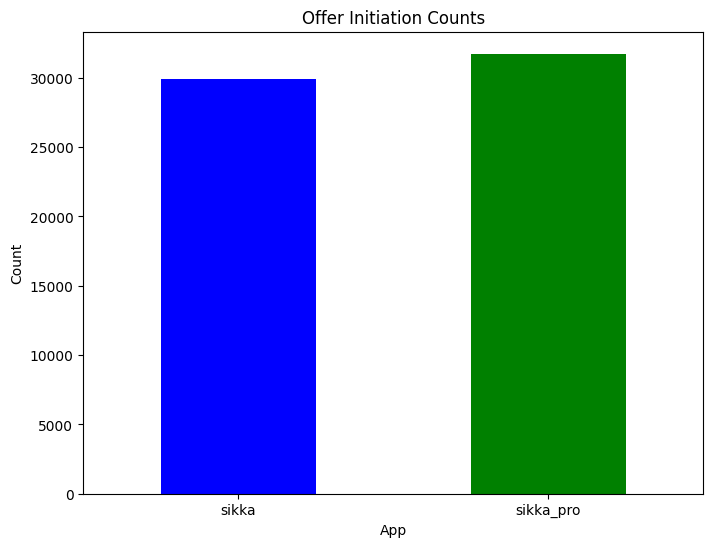

In [ ]:
# Offer Initiation: Count the number of offers initiated by users for each app
offer_initiation_counts = sikka_data.groupby('app_id')['reward_id_x'].count()

# Print the results
print("Offer Initiation Counts:")
print(offer_initiation_counts)

# Visualize Offer Initiation
plt.figure(figsize=(8, 6))
offer_initiation_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Offer Initiation Counts')
plt.xlabel('App')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



Offer Completion Counts:
app_id
sikka        4864
sikka_pro    6588
Name: reward_id_x, dtype: int64


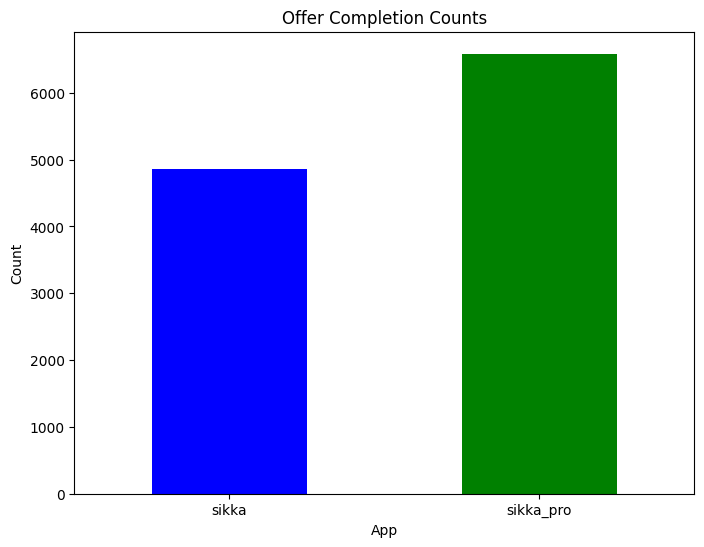

In [ ]:
# Offer Completion: Count the number of offers completed by users for each app
offer_completion_counts = sikka_data[sikka_data['status'] == 'COMPLETED'].groupby('app_id')['reward_id_x'].count()
print("Offer Completion Counts:")
print(offer_completion_counts)

# Visualize Offer Completion
plt.figure(figsize=(8, 6))
offer_completion_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Offer Completion Counts')
plt.xlabel('App')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Rewards Earned:
app_id
sikka        620478.72
sikka_pro    491945.04
Name: total_payout_in_paise, dtype: float64


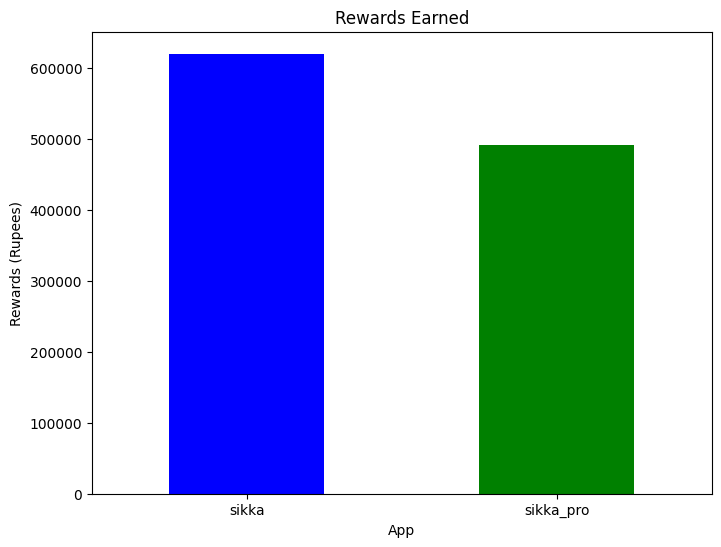

In [ ]:
# Rewards Earned: Calculate the total rewards earned by users for each app
rewards_earned = sikka_data.groupby('app_id')['total_payout_in_paise'].sum() / 100
print("Rewards Earned:")
print(rewards_earned)

# Visualize Rewards Earned
plt.figure(figsize=(8, 6))
rewards_earned.plot(kind='bar', color=['blue', 'green'])
plt.title('Rewards Earned')
plt.xlabel('App')
plt.ylabel('Rewards (Rupees)')
plt.xticks(rotation=0)
plt.show()

Revenue Generated:
app_id
sikka        1680919.68
sikka_pro    1366603.92
Name: total_revenue_in_paise, dtype: float64


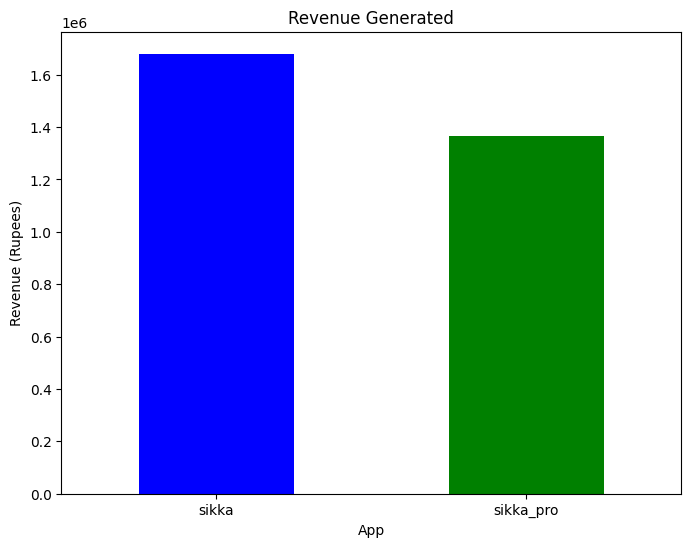

In [ ]:
# Revenue Generated: Calculate the total revenue generated for each app
revenue_generated = sikka_data.groupby('app_id')['total_revenue_in_paise'].sum() / 100

print("Revenue Generated:")
print(revenue_generated)

# Visualize Revenue Generated
plt.figure(figsize=(8, 6))
revenue_generated.plot(kind='bar', color=['blue', 'green'])
plt.title('Revenue Generated')
plt.xlabel('App')
plt.ylabel('Revenue (Rupees)')
plt.xticks(rotation=0)
plt.show()

Now We can compare the two apps, "Sikka" and "Sikka Pro," based on different metrics:

1. App Users Count:
   - Sikka: 64 users
   - Sikka Pro: 36 users

2. Offer Initiation Counts:
   - Sikka: 29,952 offers initiated
   - Sikka Pro: 31,752 offers initiated

3. Offer Completion Counts:
   - Sikka: 4,864 offers completed
   - Sikka Pro: 6,588 offers completed

4. Rewards Earned:
   - Sikka: 620,478.72
   - Sikka Pro: 491,945.04

5. Revenue Generated:
   - Sikka: 1,680,919.68
   - Sikka Pro: 1,366,603.92

To compare which app is better, we can consider different factors:

- **App Users Count:** Sikka has a higher number of app users (64) compared to Sikka Pro (36). More users indicate a larger user base for Sikka, which can potentially lead to higher engagement and revenue.

- **Offer Initiation Counts:** Both apps have a similar number of offer initiations, with Sikka having 29,952 and Sikka Pro having 31,752. The slight difference may not be significant enough to determine which app is better.

- **Offer Completion Counts:** Sikka Pro has a higher number of offer completions (6,588) compared to Sikka (4,864). This suggests that users of Sikka Pro are more likely to complete offers, indicating better user engagement.

- **Rewards Earned:** Sikka has higher rewards earned (620,478.72) compared to Sikka Pro (491,945.04). This implies that Sikka users are earning more rewards, indicating better incentives and user satisfaction.

- **Revenue Generated:** Sikka generates higher revenue (1,680,919.68) compared to Sikka Pro (1,366,603.92). Higher revenue indicates better monetization and profitability for Sikka.

Based on these insights, it appears that **Sikka has a larger user base, higher rewards earned, and greater revenue generated**. However, Sikka Pro shows better performance in terms of offer completion counts. Overall, considering the factors of user base, rewards earned, and revenue generated, Sikka seems to be the better app between the two.

Here's a table comparing the metrics for both apps:

| Metric                  | Sikka      | Sikka Pro  |
|-------------------------|------------|------------|
| App Users Count         | 64         | 36         |
| Offer Initiation Counts | 29,952     | 31,752     |
| Offer Completion Counts | 4,864      | 6,588      |
| Rewards Earned          | 620,478.72 | 491,945.04 |
| Revenue Generated       |1,680,919.68|1,366,603.92|

